# Airline Analysis

In this project, we will be imagining working for a travel agency and need to know the ins and outs of airline prices for our clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

## Univariate Analysis

1. Looking at data. What do coach ticket prices look like? What would be considered the average?

In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

flight = pd.read_csv("flight.csv")
flight

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2
...,...,...,...,...,...,...,...,...,...,...,...,...
129775,674,217,1487,No,Yes,Yes,Friday,No,Yes,383.240,1478.70,1
129776,2125,208,1479,No,Yes,Yes,Friday,No,Yes,397.825,1616.01,4
129777,1702,220,1501,No,Yes,Yes,Friday,No,Yes,380.980,1481.49,3
129778,2709,205,1484,No,Yes,Yes,Saturday,No,Yes,485.185,1589.70,5


In [68]:
print(np.mean(flight.coach_price))
print(np.median(flight.coach_price))

376.58525308213905
380.56


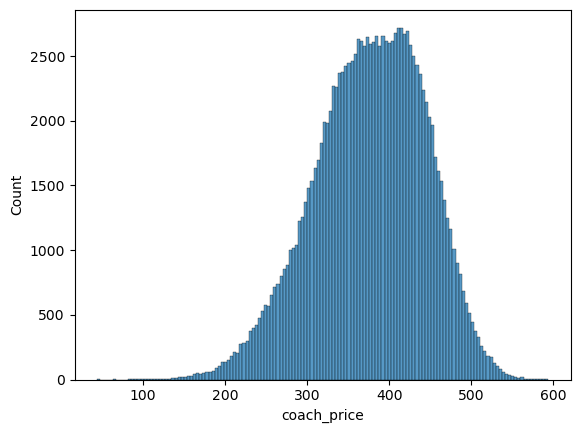

<Figure size 640x480 with 0 Axes>

In [69]:
sns.histplot(flight.coach_price)
plt.show()
plt.clf()

$500 for coach price seems to be a bit much comparing to the average price for class price. It usually depends on how long it took for the flight to get to its destination.

2. Coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights?

431.834377372817
437.115


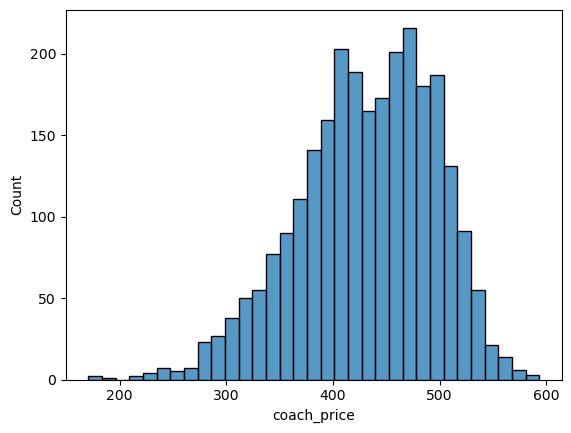

<Figure size 640x480 with 0 Axes>

In [70]:
print(np.mean(flight.coach_price[flight.hours == 8]))
print(np.median(flight.coach_price[flight.hours == 8]))
#flight.coach_price[flight.hours == 8]
sns.histplot(flight.coach_price[flight.hours == 8])
plt.show()
plt.clf()

$500 seems a bit more reasonable price for a coach class that has a flight duration of 8 hours. Comparing to how it was before, this is reasonable.

3. Let's say a flight delay would put the client at risk of missing their connecting flight. How often there are large delays? What kinds of delays are typical?

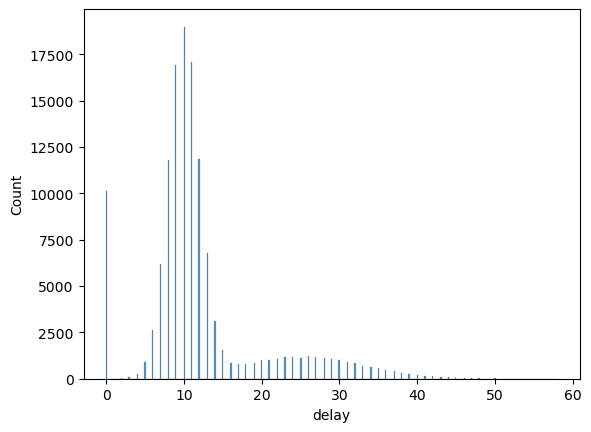

<Figure size 640x480 with 0 Axes>

In [71]:
sns.histplot(flight.delay[flight.delay <= 500])
plt.show()
plt.clf()

Usually around 10 minutes delay is typical considering it has the most counts.

## Bivariate Analysis

4. Relationship between coach and first-class prices.

In [16]:
flight.shape[0] * per

12978.0

C:\Users\axela\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


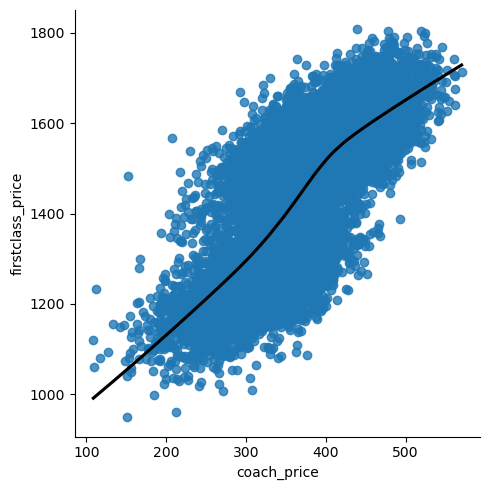

<Figure size 640x480 with 0 Axes>

In [72]:
per = 0.1
flight_sub = flight.sample(n = int(flight.shape[0] * per))

sns.lmplot(x='coach_price', y='firstclass_price', data=flight_sub, line_kws={'color':'black'}, lowess=True)
plt.show()
plt.clf()

Coach Price and First Class Price have a positive relationship. Whenever Coach Price increases, First Class Price tends to increase as well.

5. Relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi?

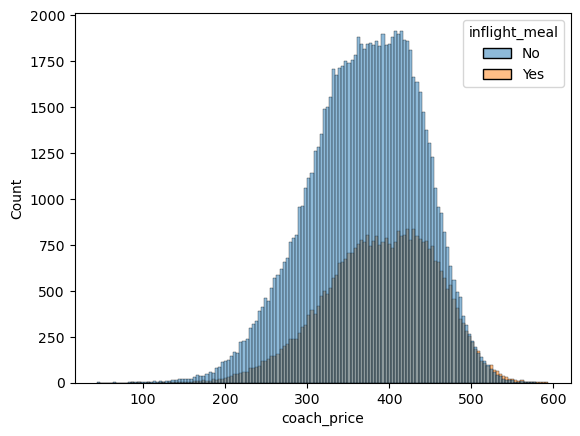

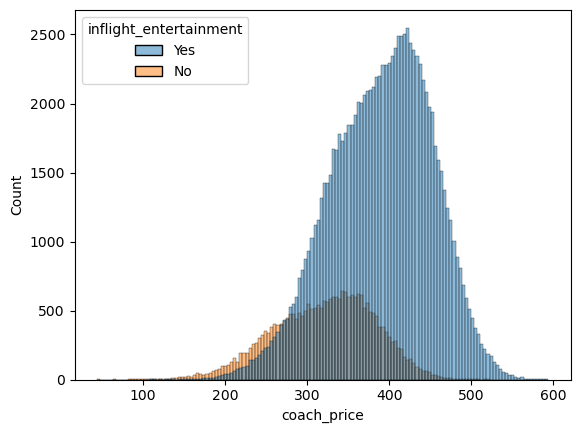

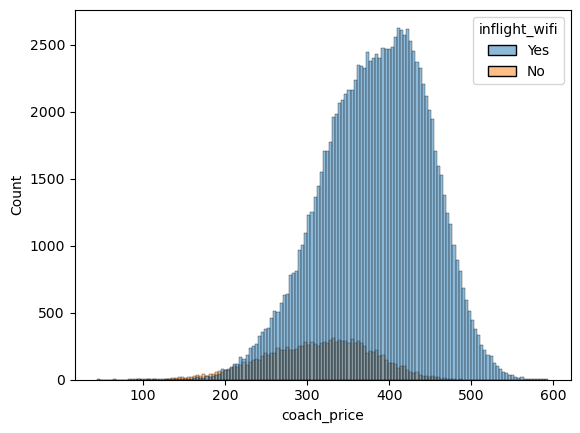

<Figure size 640x480 with 0 Axes>

In [73]:
sns.histplot(flight, x='coach_price', hue=flight.inflight_meal)
plt.show()
plt.clf()

sns.histplot(flight, x='coach_price', hue=flight.inflight_entertainment)
plt.show()
plt.clf()

sns.histplot(flight, x='coach_price', hue=flight.inflight_wifi)
plt.show()
plt.clf()

Coach Price around 400-500 tend to have inflight entertainment and wifi a lot more than having inflight meals.

6. How does the number of passengers change in relation to the length of flights?

C:\Users\axela\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


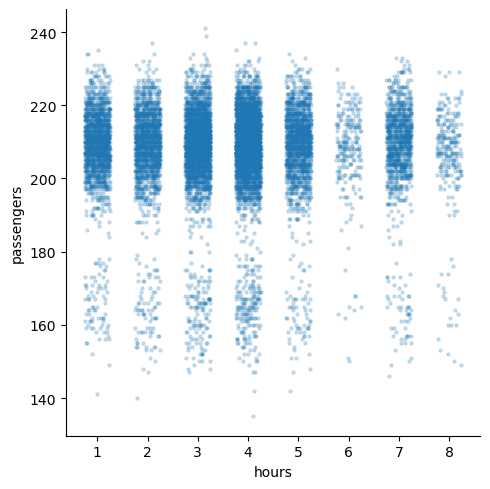

<Figure size 640x480 with 0 Axes>

In [74]:
sns.lmplot(x='hours', y='passengers', data=flight_sub, x_jitter=0.25, scatter_kws={"s": 5, "alpha": 0.2}, fit_reg=False)
plt.show()
plt.clf()

## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

C:\Users\axela\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


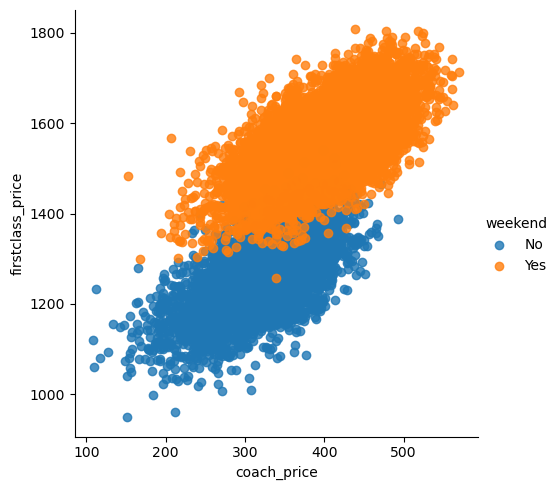

<Figure size 640x480 with 0 Axes>

In [75]:
sns.lmplot(x='coach_price', y='firstclass_price', data=flight_sub, hue='weekend', fit_reg=False)
plt.show()
plt.clf()

Coach class departs on weekend on a price of around 300-500 while First class departs on weekend on a price of around 1400-1800.

8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

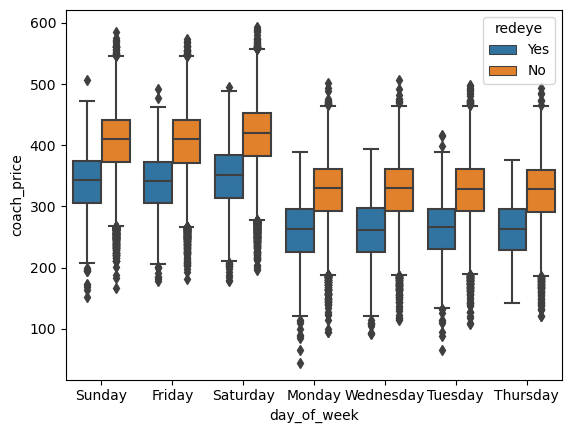

<Figure size 640x480 with 0 Axes>

In [76]:
sns.boxplot(x='day_of_week', y='coach_price', hue='redeye', data=flight)
plt.show()
plt.clf()

Coach price for redeye flights on the weekends seems to be more expensive than on the weekdays. There seems to be an outlier on 'Sunday' but overall the price seems to be fairly consistent.